<a href="https://colab.research.google.com/github/zacharyselk/Test-Project/blob/trunk/draft_Day2_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![title](NAT.png)

<h2><center><font color='green'>Introduction</font></center></h2>
<h1><center><font color='green' size="20px">Supervised Learning</font></center></h1>
<br>

<h4><center>By: Cameron Hildebrandt - January 30th, 2021 - Lesson 2a</center></h4>

<br><br>
Today we will cover supervised learning by teaching you how to learn and understand any ML model and how to use any supervised machine learning model without being afraid of the underlying math behind it.
<br><br>
We will teach you arguably the simplest machine learning model, linear regression, in 3 different ways! Hopefully leaving you with the understanding that there can be more than 1 definitions and ways via which you can learn,  understand and apply a ML concept.
<br>
<h3>Table of Contents</h3>

* Supervised Learning
* Linear Regression
  * Statistical Perspective
  * Mathematical Perspective
  * Computer Science(ML) Perspective
* Logistic Regression: Case Study
* Exercise

<h3>Import Required Libraries</h3>

In [ ]:
# Download from the internet if not already installed
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn

# Import into Jupyter
import matplotlib.pyplot as plt
from ipywidgets import interactive
import numpy as np
from sklearn import linear_model
import random

print("\nDone!")

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

Done!


# Machine Learning

The definition of machine learning is "The use and development of computer systems that are able to learn and adapt without following explicit instrunctions, by using algorithms and statistical models to analyze and draw inferences from patterns in data."

## When dealing with machine learning problems, there are generally two types of data (and machine learning models):
- Supervised data: always has one or multiple targets associated with it.
- Unsupervised data: does not have any target variable.

A supervised problem is considerably easier to tackle than an unsupervised one. A problem in which we are required to predict a value is known as a supervised problem. For example, if the problem is to predict house prices given historical house prices, with features like presence of a hospital, school or supermarket, distance to nearest public transport, etc. is a supervised problem. Similarly, when we are provided with images of cats and dogs, and we know beforehand which ones are cats and which ones are dogs, and if the task is to create a model which predicts whether a provided image is of a cat or a dog, the problem is considered to be
supervised.

## Linear Regression
One of the tools in supervised learning is Regression.
<br><br>
The goal of regression is to find something that best represents our datapoints. It could be a Function, an Algorithm, or anything else. In most cases it turns out to be a mathematical function.<br>
In this case with **Linear regression**, as the name implies, we are trying to find a linear mathematical function(ex. a line) that can best represent our datapoints. Rigorously speaking, the "best" line is the line that minimizes the squared error between the line and the datapoints. Let's explore what the heck that means!
<br><br>
First, let's choose some random datapoints to regress over.

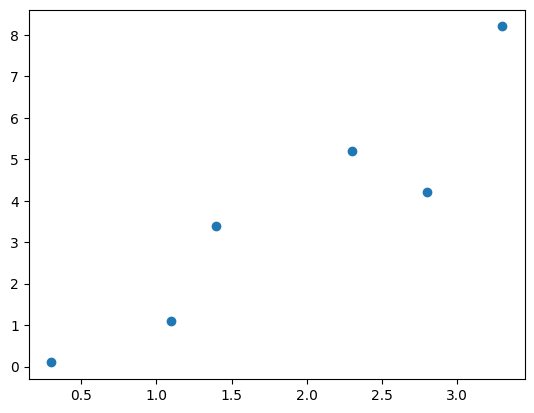

In [ ]:
# Define arbutrary datapoints
x = np.array([0.3, 1.4, 2.3, 1.1, 3.3, 2.8])
y = np.array([0.1, 3.4, 5.2, 1.1, 8.2, 4.2])

# Plot the datapoints
plt.plot(x, y, "o")
plt.show()

How exactly are we going to draw a line that best represents that data? We can't exactly use our highschool knowledge of fitting a y = mx+b line to some points since there is no single line that will go through all of these points. This is what's called an overdetermined system.
<br><br>
Let's just pick a random m and b for the equation y = mx + b and see how well that fits our data!

In [ ]:
import plotly.express as px

[0.46 1.78 2.86 1.42 4.06 3.46]


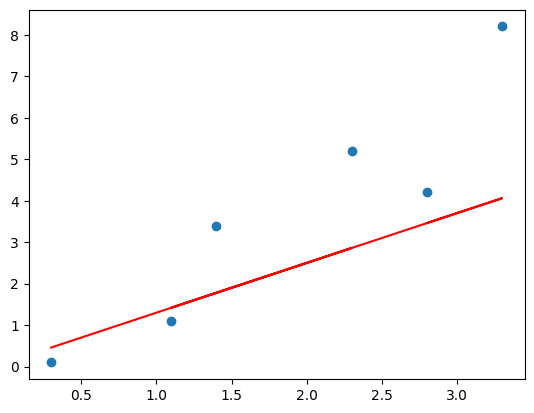

In [ ]:
# Pick random m and b
m = 1.2
b = 0.1

# Calculate estimated y-values (yPred)
yPred = m*x + b

# Plot it
print(yPred)
plt.clf()
plt.plot(x, y, "o")
plt.plot(x, yPred, color="r")
plt.show()

Not too bad... but not really that great either. We need to find a way to evaluate the quality of our randomly chosen line. To do that, lets define squared error. We want to find the difference between each of the points:<br><br>
\begin{equation}
(y_i - yPred_i)
\end{equation}

<br>
But we want to highlight those error that are big from smaller ones. And to make those bigger errors stand out, we square it. You might ask why do we want to highlight those errors? Its because we want to minimize the error as much as possible. We know that we cannot achieve 0 error. But we can try to find out those points where the error is BIG and try to fit our line there. <br>
\begin{equation}
(y_i - yPred_i)^2
\end{equation}

<br>
And find the sum of square errors for all points.<br>

\begin{equation}
\sum_{i=0}^n (y_i - yPred_i)^2
\end{equation}

<br><br>
This will give you a single number that represents the "quality" of your line. Let's try this out with our random line.

In [ ]:
sumError = 0
for i in range(len(y)):
    sumError += (y[i] - yPred[i])**2
print("Error:", sumError)

Error: 26.019199999999998


Nice, let's pick a better m and b and see what happens to our number!

[0.7 2.9 4.7 2.3 6.7 5.7]


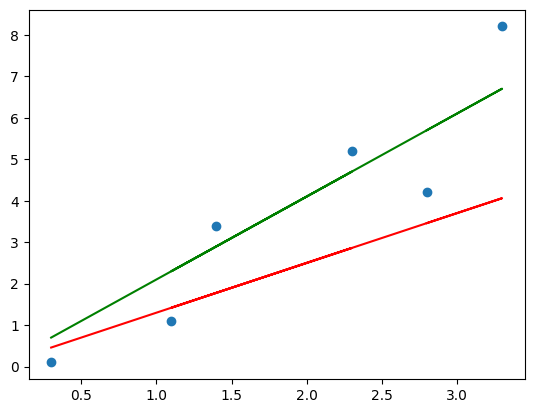

In [ ]:
# Pick a better m and b
m = 2
b = 0.1

# Calculate estimated y-values (yPred)
yPred2 = m*x + b

# Plot it
print(yPred2)
plt.clf()
plt.plot(x, y, "o")
plt.plot(x, yPred, color="r") # replotting old line for comparison
plt.plot(x, yPred2, color="g")
plt.show()


In [ ]:
sumError = 0
for i in range(len(y)):
    sumError += (y[i] - yPred2[i])**2
print("Error:", sumError)

Error: 6.799999999999998


So the smaller the number, the better the line represents the data. So if we find the line with the minimum squared error, then we have the line that best represents the data!
<br><br>

### Statistically

if you are good with statistics then it provides a good estimtes for $m$ and $b$

$$m = {{\sum_{i=1}^n (x_i - x̄) (y_i - ȳ)} \over {\sum_{i=1}^n (x_i - x̄)^2}}, $$
and
$$b = ȳ - mx̄$$
where,
$x̄ = {1 \over n}{\sum_{i=1}^n x_i}$ and $ȳ = {1 \over n}{\sum_{i=1}^n y_i}$

In [ ]:
m = (np.sum((x-x.mean())*(y-y.mean()))) / (np.sum((x-x.mean())**2))
b = (y.mean() - m*x.mean())
print(f"our line is y = {m}x + {b}")

our line is y = 2.4069037656903767x + -0.7928870292887029


### Mathematically

Another way we can find $m$ and $b$ is through linear algebra.
<br><br>
Remember earlier we said, "We can't exactly use our highschool knowledge of fitting a y = mx+b line to some points since there is no single line that will go through all of these points." Well it turns out we can use our highschool knowledge if combined with a little bit of linear algebra.
<br>
if we can think of $x$ and $y$ as matrices $X$ and $Y$, we can simplify our line equations and represent it into matrix form,

$$Y = mX + b$$
\begin{align}
    \begin{bmatrix}
        y_{1} \\
        y_{2} \\
        \vdots \\
        y_{n}
    \end{bmatrix} =& \
    m\begin{bmatrix}
        x_{1} \\
        x_{2} \\
        \vdots \\
        x_{n}
    \end{bmatrix} + b\\
    \begin{bmatrix}
        y_{1} \\
        y_{2} \\
        \vdots \\
        y_{n}
    \end{bmatrix} =& \
    m\begin{bmatrix}x_{1} x_{2} \dots x_{n}\end{bmatrix}' + \
    b\begin{bmatrix}{1} {1} \dots {1}\end{bmatrix}'\\
    \begin{bmatrix}
        y_{1} \\
        y_{2} \\
        \vdots \\
        y_{n}
    \end{bmatrix} =& \
    \bigg[ m \ b \bigg] \begin{bmatrix}
      \begin{bmatrix}x_{1}  x_{2} \dots x_{n} \end{bmatrix}' \\
      \begin{bmatrix}1  1 \dots 1 \end{bmatrix}'
    \end{bmatrix} \\
\end{align}
$$Y = M\hat{X}$$

where $\hat{X}$ is just $X$ with Identity vector($I$) appended.
<br>
Now, we just have to solve for $M$,
$$Y\hat{X}^{-1}=M$$

In [ ]:
Y = np.matrix(y)
X = np.concatenate((np.matrix(x), np.matrix(np.ones(x.shape[0]))), axis=0)
M = Y*np.linalg.pinv(X)
m, b = M[0, 0], M[0, 1]
print(f"our line is y = {m}x + {b}")

our line is y = 2.4069037656903776x + -0.7928870292887076


### In Computer Science / Gradient Descent (Calculus)

And finally, I believe this is at the core of (any)regression algorithm(And possible even useful to understand neural networks): Gradient Descent. "Gradient descent is an iterative optimization algorithm to find the minimum of a function." Usually that's some sort of loss/error function($L$). In our case that function is our mean squared error that we discussed earlier.

$$L = {1 \over n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

Here $y_i$ is the actual value and $\bar{y_i}$ is the predicted value. Lets substitute the value of $\bar{y_i}$.

$$L = {1 \over n} \sum_{i=0}^n (y_i - (m{x_i}+b))^2 $$

After defining our loss function, now let's look at Gradient Decent and see how it works. We try applying gradient descent to $m$ and $b$ and approach it step by step:
1. Initialize let $m = 0$ and $b = 0$. Let $l$ be our learning rate. This controls how much the value of m changes with each step. Or how much our model is learning in each step. $l$ could be a small value like 0.0001 for good accuracy.
2. Calculate the partial derivative of the loss function($L$) with respect to $m$, and plug in the current values of $x$, $y$, $m$ and $b$ in it to obtain the derivative value $\theta$.

$$ {{\partial}L \over {\partial}m} = {\theta}_m = {1\over n}\sum_{i=0}^n 2(y_i - (m{x_i}+b))(-x_i)$$
$${\theta}_m = {-2\over n}\sum_{i=0}^n x_i(y_i - \bar{y_i})$$

* ${\theta}_m$ is the value of the partial derivative with respect to m. Similarly lets find the partial derivative of $L$ with respect to $b$, ${\theta}_b$ :

$$ {{\partial}L \over {\partial}b} = {\theta}_b = {-2\over n}\sum_{i=0}^n (y_i - \bar{y_i})$$

3. Now we update the current value of $m$ and $b$ by propogating it towards the opposite direction of their respective gredients, and scaling the propogation down by $l$:
$$m = m - l \times {\theta}_m$$
$$b = b - l \times {\theta}_b$$

4. We repeat this process until we reach convergence. i.e. our loss function is a very small value or ideally 0 (which means 0 error or ~100% accuracy). The value of $m$ and $b$ that we are left with now will be the optimum values.

In practice this is how it looks like:

In [ ]:
# Building the model
m = 0
b = 0

l = 0.01  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

def lr_gradient_descent_itr(m, b, l=l):
    y_pred = m*x + b  # The current predicted value of Y
    loss = (y - y_pred)**2
    theta_m = (-2/n) * sum(x * (y - y_pred))  # Derivative wrt m
    theta_b = (-2/n) * sum(y - y_pred)  # Derivative wrt b
    m_new = m - l * theta_m  # Update m
    b_new = b - l * theta_b  # Update b
    return m_new, b_new, loss.mean()

def lr_gradient_descent(l, epoch):
    m, b = 0, 0
    plt.figure(2)
    for i in range(epoch):
        m, b, loss = lr_gradient_descent_itr(m, b, l)
    plt.plot(x, y, "o")
    plt.plot(x, m * x + b)
    plt.title(f"y = {np.round(m, decimals=2)}x + {np.round(b, decimals=2)}, loss={np.round(loss, decimals=2)}")
    # plt.ylim(-5, 5)
    plt.show()

ls = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
interactive_plot = interactive(lr_gradient_descent, l=ls, epoch=(1, 100000))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(Dropdown(description='l', options=(1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1), value=1e-…

<h2>Machine Learning Perspective</h2>

Fortunately we don't need to do any math or to understand it this deep. Though you will later realize that even a little bit of understanding helps a lot in disigning the modeling process. Also, since our peers, who came before us have already built the necessery tools and libraries, with hard coded math in python, for us to Just use it.

In machine learning, we are going to do the exact same thing, but we are going to give some new names to the different elements.
<br><br>
We are going to call m and b <u>parameters</u>.<br>
The linear equation (y = mx + b) is called the <u>model</u>.<br>
This model is said to be <u>trained</u> if we have found the "best" values for the parameters.<br>
We use a <u>training algorithm</u> to train/fit the model, in this case, it was linear regression.
<br><br>
It is important to understand concepts as we go though the rest of the workshop, as this is the machine learning jargon that will be used throughout the course! Feel free to come back to this for reference at any point throughout the workshop!
<br><br>
We generally use sklearn, an ML library, to help us with these types of ML problems.

In [ ]:
model = linear_model.LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
m, b = model.coef_[0,0], model.intercept_[0]
print(f"our line is y = {m}x + {b}")

our line is y = 2.4069037656903762x + -0.792887029288702


In [ ]:
# and this is how we predict new values prediction
x_new = 2
y_pred = model.predict(np.array([x_new]).reshape(1, -1))[0,0]
print(f"{y_pred}, {2.4069037656903762*x_new + -0.792887029288702}")

4.02092050209205, 4.02092050209205


# RTFM!

if you want to know how a model, or any algorithm works at any time or confused about which model to use & how to use, just remember to "<u>**READ THE FRIENDLY MANNUAL**</u>"

In [ ]:
help(model)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 | 

<h3>Exercise</h3>
Below are some lists representing a stripped down dataset from <a href="https://www.kaggle.com/mohansacharya/graduate-admissions">Kaggle</a> that shows a student's likelihood of admission to university given a bunch of student data such as test scores, the prestige of the university, and if the student does research. The "GRE" list below is the student's GRE score and the "adm" list is their likelihood of admission.<br>

* Create a test/train split of the data
* Build a model
* Score the model
* Predict these student's likelihood of admission

    * Student 1: GRE 299
    * Student 2: GRE 322
    * Student 3: GRE 420
    
What's up with Student 3's likelihood?

In [ ]:
GRE = np.array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328, 307, 311, 314, 317, 319, 318, 303, 312, 325, 328, 334, 336, 340, 322, 298, 295, 310, 300, 327, 338, 340, 331, 320, 299, 300, 304, 307, 308, 316, 313, 332, 326, 322, 329, 339, 321, 327, 313, 312, 334, 324, 322, 320])
adm = np.array([0.92, 0.76, 0.72, 0.8, 0.65, 0.9, 0.75, 0.68, 0.5, 0.45, 0.52, 0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7, 0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91, 0.9, 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87, 0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7, 0.64])

percentTrain = 0.8
cutoff = int(percentTrain*len(GRE))

# Shuffle order
data = list(zip(GRE, adm))
random.shuffle(data)
GREShuffled, admShuffled = zip(*data)

GRETrain = GREShuffled[:cutoff]
GRETest = GREShuffled[cutoff:]

admTrain = admShuffled[:cutoff]
admTest = admShuffled[cutoff:]

# Train model
model3 = linear_model.LinearRegression()
model3.fit(np.transpose([GRETrain]), admTrain)

# Evaluate the model
admPred = model3.predict(np.transpose([admTest]))

sumError = 0
for i in range(len(admTest)):
    sumError += (admTest[i] - admPred[i])**2
print("MSE:", sumError/len(admTest))


# Check the student's estimated admission likelihood
studs = np.array([299, 322, 420])

studsPred = model3.predict(np.transpose([studs]))

for i in range(len(studsPred)):
    print("Student " + str(i) + "'s admission likelihood: " + str(studsPred[i]))

MSE: 9.684858097219513
Student 0's admission likelihood: 0.5190912758185515
Student 1's admission likelihood: 0.7451748500201703
Student 2's admission likelihood: 1.708487470531416


# Case Study!